# 2020/6/13 決定木分析
###### 決定木分析のアルゴリズムを自作してみる

In [1]:
#データ読み込み
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris=load_iris()
X=iris.data
y=iris.target

In [2]:
#関数定義
import numpy as np

#ジニ不純度の計算
def gini(y_func):
    classes=np.unique(y_func)
    Ig=1
    for c in classes:
        Ig=Ig-((y_func==c).sum()/len(y_func))**2
        return Ig

#情報利得の計算
def IG(y_func,y_left,y_right):
    Igp=gini(y_func)
    Igleft=gini(y_left)
    Igright=gini(y_right)
    
    IG=Igp-len(y_left)/len(y_func)*Igleft-len(y_right)/len(y_func)*Igright
    return IG

In [3]:
#情報利得計算
import pandas as pd

value_list=[]
result_list=[]

#各特徴量でループ
for i in range(len(X[0])):
    result=[]
    
    #特徴量の数値を整列
    uniq_feature=np.unique(X[:,i])
    
    #隣同士の特徴量の中心をsplitpointに指定
    split_points=(uniq_feature[:-1]+uniq_feature[1:])/2
    
    #各splitpointの場合の情報利得を計算
    for j in split_points:
        y_left=y[(X[:,i]<=j)]
        y_right=y[(X[:,i]>j)]
        
        result.append(IG(y,y_left,y_right))
    
    result_list.append(result)
    value_list.append(split_points)

###### petal width=0.8が情報利得最大となる

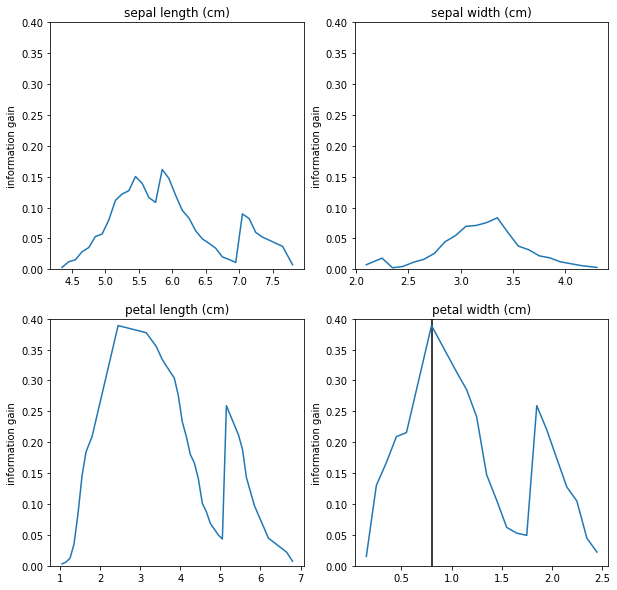

In [4]:
#可視化
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(5*2,5*2))
axes=ax.flatten()

for n in range(len(iris.feature_names)):
    axes[n].plot(value_list[n],result_list[n])
    axes[n].set_ylim(0,0.4)
    axes[n].set_title(iris.feature_names[n])
    axes[n].set_ylabel('information gain')
axes[3].vlines(x=0.8,ymin=0,ymax=0.4)

## 実際に決定木を使用してみる

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=3)
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

###### 可視化した結果確かにwidth=0.8で分割されている

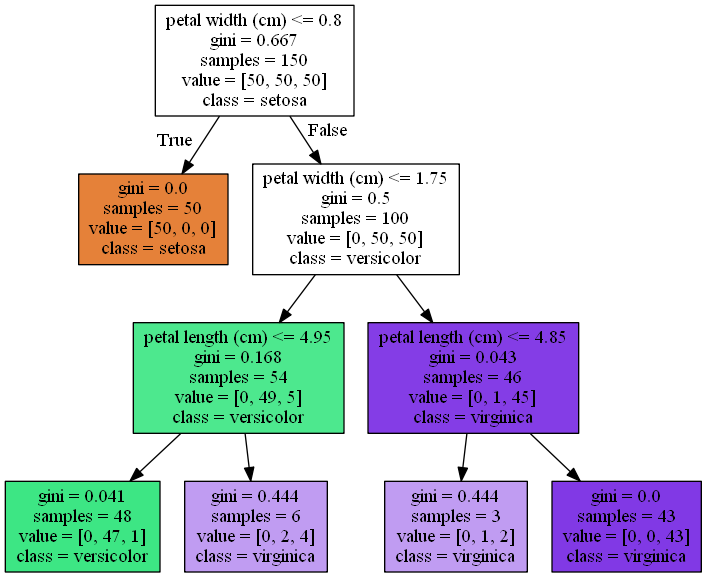

In [6]:
import pydotplus
from IPython.display import Image
from graphviz import Digraph
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    proportion=False)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## 重要度の計算を確認

In [7]:
clf.feature_importances_

array([0.        , 0.        , 0.05393633, 0.94606367])

In [8]:
iris.feature_names[3]

'petal width (cm)'

###### 手計算の結果とおおむね一致する

In [9]:
width=(0.667*150-0*50-100*0.5)+(0.5*100-0.168*54-0.043*46)
length=(0.168*54-0.041*48-0.444*6)+(0.043*46-0.444*3-0*43)
width/(width+length)

0.9459430733584168